In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
acc_instFreq=np.load("acc_instantaneous_freq.npy")

In [3]:
print(acc_instFreq.shape)
print(np.array(acc_instFreq[0][0]).shape)
print(np.array(acc_instFreq[1][0]).shape)
print(np.array(acc_instFreq[2][0]).shape)

(9, 3)
(75, 5000)
(61, 5000)
(60, 5000)


In [4]:
print(np.array(acc_instFreq[0][0])[1].shape)
rcParams['figure.figsize'] = 15,5

(5000,)


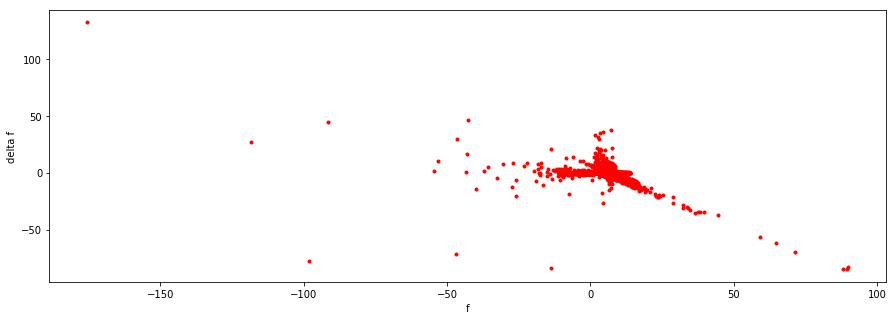

In [6]:
TSI = list()
axi = list()
ins = list()

for patientt in range(acc_instFreq.shape[0]):#10
    for axiss in range(acc_instFreq.shape[1]):#3
        for instt in range(np.array(acc_instFreq[patientt][axiss]).shape[0]):#75
            delta_f = np.diff(np.array(acc_instFreq[patientt][axiss])[instt])
            delta_f = np.pad(delta_f, (0, 1), 'constant')
            f = np.array(acc_instFreq[patientt][axiss])[instt]
            plt.xlabel("f")
            plt.ylabel("delta f")
            plt.plot(f,delta_f,'r.')
            break
            q75, q25 = np.percentile(delta_f, [75 ,25])
            iqr = q75 - q25
            ins.append(iqr)
        axi.append(ins)
        ins=list()
    TSI.append(axi)
    axi=list()

In [6]:
print(len(TSI))
print(len(TSI[0]))
print(len(TSI[0][0]))

9
3
75


In [7]:
print(np.array(TSI).shape)

(9, 3)


In [8]:
np.save("TSI",arr = np.array(TSI))